## Automatizaciones

Con Python podemos llegar a realizar desde operaciones sencillas de datos hasta visualizaciones complejas o automatizaciones de procesos.

En Python hay muchas librerias y frameworks creados por la comunidad para resolver muchos procesos. Así que si tienes un proceso que quieras realizar, busca si ya existe una librería con la que puedas facilitarte la programación y en unas cuantas lineas de código.

<img src="https://miro.medium.com/max/1400/1*PMvSWYzafqUVMsmQDsWEPA.png"/>

## Guardar mapas

In [49]:
!pip install folium

In [50]:
!wget https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json

--2024-07-10 17:23:54--  https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87688 (86K) [text/plain]
Saving to: ‘us_states.json.1’

us_states.json.1    100%[===================>]  85.63K  --.-KB/s    in 0.02s   

2024-07-10 17:23:54 (3.79 MB/s) - ‘us_states.json.1’ saved [87688/87688]



In [52]:
import pandas as pd

import folium
import json

state_geo = json.load(open("us_states.json"))

state_data = pd.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [56]:
m = folium.Map(location=[48, -102], zoom_start=5,width="80%", height="80%", control_scale=True)
# Agreguemos la informacion del dataframe en el mapa
folium.Choropleth(
    geo_data=state_geo,     # data geográfica (JSON con los estados)
    name="choropleth",       # nombre del mapa
    data=state_data,        # dataframe con los datos
    columns=["State", "Unemployment"],  # columnas del dataframe
    key_on="feature.id",    # llave para unir los datos
    fill_color="YlGn",      #
    fill_opacity=0.7,      # opacidad del color
    line_opacity=0.2,      # opacidad de la linea
    legend_name="Unemployment Rate (%)",  # nombre de la leyenda
    highlight=True,        # resaltar el estado al pasar el mouse por encima
    nan_fill_color='white',
    nan_fill_opacity=0.5,
).add_to(m)               # Agregar este gráfico al mapa anterior

folium.LayerControl().add_to(m) # Agregar controles al mapa para moverlo
m

In [57]:
m.save("map.html")

## Envío de correos con python

Enviar correos electrónicos desde aplicaciones de Python es una tarea común y necesaria en muchos proyectos, desde notificaciones automáticas hasta boletines informativos. Python facilita esta tarea mediante la biblioteca estándar smtplib, que proporciona una interfaz simple y efectiva para enviar correos electrónicos utilizando el protocolo SMTP (Simple Mail Transfer Protocol).


In [63]:
# Importemos las librerias
from email.message import EmailMessage
import smtplib

# definamos la información que necistamos
remitente = "direccion@gmail.com"
destinatario = "destinatario@ejemplo.com"

mensaje = "¡Hola, mundo!"


In [64]:
email = EmailMessage()

email["From"] = remitente
email["To"] = destinatario
email["Subject"] = "Correo de prueba de automatización"
email.set_content(mensaje)

Para poder autenticarte en el servidor de google necesitas la clave de aplicaciones para poder generar una clave, esta es diferente a la contraseña del correo

[Crear Clave de aplicación](https://myaccount.google.com/apppasswords)

In [62]:
smtp = smtplib.SMTP_SSL("smtp.gmail.com") # Iniciamos la conexión a gmail, para otros correos se debe cambiar el parametro.
smtp.login(remitente, "clave_de_gmail_123") # Autenticación con la clave de aplicaciones de google
smtp.sendmail(remitente, destinatario, email.as_string()) # Enviamos el correo
smtp.quit() # Cerramos la conexión

(221,
 b'2.0.0 closing connection 8926c6da1cb9f-4c0b1b1094bsm1286049173.43 - gsmtp')

In [ ]:
# Este sería el código para enviar desde un correo de outlook.
smtp = smtplib.SMTP("smtp-mail.outlook.com", port=587)
smtp.starttls()
smtp.login(remitente, "clave_de_outlook_123") # Autenticación con la contraseña del correo (esta si es la contraseña de la cuenta desde la que quieres enviar el correo)
smtp.sendmail(remitente, destinatario, email.as_string())
smtp.quit()

### Envío de adjuntos.




In [66]:
# Importemos las librerias
from email.message import EmailMessage
import smtplib

# definamos la información que necistamos
remitente = "direccion@gmail.com"
destinatario = "destinatario@ejemplo.com"

mensaje = "¡Hola, mundo!"
email = EmailMessage()

email["From"] = remitente
email["To"] = destinatario
email["Subject"] = "¡Enviado desde Python!"

email.set_content(mensaje)


smtp = smtplib.SMTP_SSL("smtp.gmail.com") # Iniciamos la conexión a gmail, para otros correos se debe cambiar el parametro.
smtp.login(remitente, "clave_de_gmail_123") # Autenticación con la clave de aplicaciones de google

(235, b'2.7.0 Accepted')

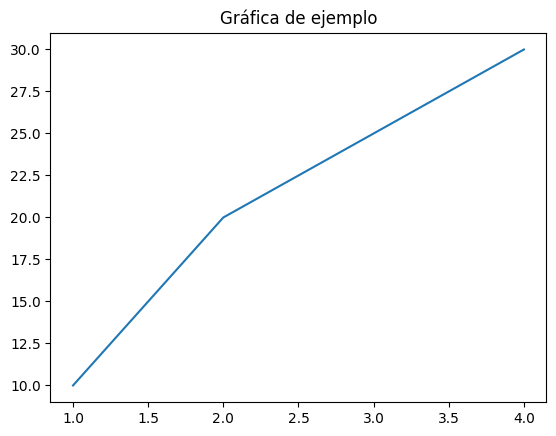

In [67]:
# Adjuntar un archivo .html que creamos del mapa

with open("map.html", "rb") as f:
    email.add_attachment(
        f.read(),
        filename="map.html",
        maintype="text",
        subtype="html"
    )

import matplotlib.pyplot as plt
# Crear y adjuntar una gráfica como archivo .png
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('Gráfica de ejemplo')

plt.savefig("grafica.png") # Tenemos que guardar el archivo

with open("grafica.png", "rb") as f:
    email.add_attachment(
        f.read(),
        filename="grafica.png",
        maintype="image",
        subtype="png"
    )


In [68]:
smtp.sendmail(remitente, destinatario, email.as_string())
smtp.quit()


(221,
 b'2.0.0 closing connection 8926c6da1cb9f-4c0b1b0d427sm1299772173.64 - gsmtp')

### Envío masivo de correos.

In [69]:
import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/BioAITeamLearning/IntroPython_2024_01_UAI/main/Data/users.csv")
df

,Unnamed: 0,first_name,last_name,email,email_verified,signup_date,referral_count,balance
0,aaron,Aaron,Davis,aaron6348@gmail.com,True,2018-08-31,6,18.14
1,acook,Anthony,Cook,cook@gmail.com,True,2018-05-12,2,55.45
2,adam.saunders,Adam,Saunders,adam@gmail.com,False,2018-05-29,3,72.12
3,adrian,Adrian,Fang,adrian.fang@teamtreehouse.com,True,2018-04-28,3,30.01
4,adrian.blair,Adrian,Blair,adrian9335@gmail.com,True,2018-06-16,7,25.85
...,...,...,...,...,...,...,...,...
470,wilson,Robert,Wilson,robert@yahoo.com,False,2018-05-16,5,59.75
471,wking,Wanda,King,wanda.king@holt.com,True,2018-06-01,2,67.08
472,wright3590,Jacqueline,Wright,jacqueline.wright@gonzalez.com,True,2018-02-08,6,18.48
473,young,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39


Vamos a enviarle correos a nuestras cuentas verificadas y con un balance mayor a 95 USD



In [87]:
df_verified = df[(df["email_verified"] == True) & (df["balance"] > 95)]
df_verified

,Unnamed: 0,first_name,last_name,email,email_verified,signup_date,referral_count,balance
68,christopher,Christopher,NaN,christopher@gmail.com,True,2018-07-24,3,96.96
74,clayton6074,Robert,Clayton,robert@gmail.com,True,2018-01-12,7,97.05
84,crane203,Valerie,Crane,valerie7051@hotmail.com,True,2018-05-12,3,98.69
139,eugene4448,Eugene,NaN,eugene@gmail.com,True,2018-06-08,0,95.38
208,jennifer.wong,Jennifer,Wong,jwong@yahoo.com,True,2018-07-03,7,95.10
234,joseph2431,Joseph,Harris,joseph@gmail.com,True,2018-03-07,5,95.47
245,karen.snow,Karen,Snow,ksnow@yahoo.com,True,2018-05-06,2,99.38
259,king,Billy,King,billy.king@hotmail.com,True,2018-05-29,4,98.80
260,king3246,Brittney,King,brittney@yahoo.com,True,2018-04-15,6,98.79
296,margaret265,Margaret,NaN,margaret@gmail.com,True,2018-01-05,1,96.14


In [88]:
# Veamos que le vamos a mandar a cada uno con la informacion del dataset

for index, row in df_verified.iterrows():
    print(f"Hello,{row['first_name']} this is your balance: {row['balance']}. This is just a test")

Hello,Christopher this is your balance: 96.96. This is just a test
Hello,Robert this is your balance: 97.05. This is just a test
Hello,Valerie this is your balance: 98.69. This is just a test
Hello,Eugene this is your balance: 95.38. This is just a test
Hello,Jennifer this is your balance: 95.1. This is just a test
Hello,Joseph this is your balance: 95.47. This is just a test
Hello,Karen this is your balance: 99.38. This is just a test
Hello,Billy this is your balance: 98.8. This is just a test
Hello,Brittney this is your balance: 98.79. This is just a test
Hello,Margaret this is your balance: 96.14. This is just a test
Hello,Paul this is your balance: 98.62. This is just a test
Hello,Peter this is your balance: 96.79. This is just a test
Hello,Steven this is your balance: 97.38. This is just a test
Hello,Timothy this is your balance: 99.9. This is just a test


In [89]:
# Ahora creemos una función que envíe el correo y que como parametro reciba, mensaje y correo de destino.
# Importemos las librerias
from email.message import EmailMessage
import smtplib

def send_mail(mensaje,destinatario):
  remitente = "jspinad@gmail.com"

  email = EmailMessage()

  email["From"] = remitente
  email["To"] = destinatario
  email["Subject"] = "¡Enviado desde Python test!"

  email.set_content(mensaje)


  smtp = smtplib.SMTP_SSL("smtp.gmail.com") # Iniciamos la conexión a gmail, para otros correos se debe cambiar el parametro.
  smtp.login(remitente, "caar kfqv zjoo isfn") # Autenticación con la clave de aplicaciones de google
  smtp.sendmail(remitente, destinatario, email.as_string())
  smtp.quit()


In [90]:
# Ahora enviemos un correo por cada usuario del dataframe
for index, row in df_verified.iterrows():
  mensaje = f"Hello,{row['first_name']} this is your balance: {row['balance']}. This is just a test"
  destino = row['email']
  send_mail(mensaje,destino)

## Dash

Dash es un framework de Python diseñado para crear aplicaciones web interactivas de manera rápida y sencilla. Desarrollado por Plotly, Dash permite a los usuarios construir aplicaciones que integran visualizaciones de datos dinámicas y una interfaz de usuario intuitiva sin necesidad de conocimientos avanzados de desarrollo web.


### Estructura de una Aplicación Dash

Una aplicación típica de Dash consta de tres partes principales:

1. Layout: Define la estructura visual de la aplicación, especificando los componentes y su disposición en la página. El layout se describe utilizando estructuras de datos de Python.
2. Callbacks: Define las interacciones entre los componentes. Los callbacks son funciones que especifican cómo los componentes deben actualizarse en respuesta a eventos, como clics de botones o cambios en un formulario.
3. Servidor: Dash incluye un servidor web integrado basado en Flask, lo que permite ejecutar la aplicación localmente durante el desarrollo y luego desplegarla fácilmente en producción.


In [91]:
!pip install dash # Instalemos la libreria de Dash

In [92]:
# Este pedazo de código es para poder correr Dash sobre los notebooks sin errores
# Nativamente, dash no funciona en Colab entonces debemos colocar estas dos lineas
from dash import jupyter_dash
jupyter_dash.default_mode="external"

In [93]:
from dash import Dash, html, dcc # Estos son los componentes de Dash que vamos a utilizar más adelante
import plotly.express as px # Importamos la librería de plotly para realizar los gráficos
import pandas as pd


In [94]:
app = Dash(__name__) # Creamos un objeto Dash, esta será la aplicación.

In [95]:
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})
df

,Fruit,Amount,City
0,Apples,4,SF
1,Oranges,1,SF
2,Bananas,2,SF
3,Apples,2,Montreal
4,Oranges,4,Montreal
5,Bananas,5,Montreal


In [96]:
# Generamos un gráfico dinámico que luego vamos a poner en el dashboard.
fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")
fig

In [97]:
# Definir el layout (distribución) de la aplicación
app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True) # Ejecutamos la aplicación y vamos a ver el enlace que se genera, este lo podemos compartir en nuestro trabajo.

Dash app running on:


<IPython.core.display.Javascript object>

### Ejemplo básico 2

In [98]:
import plotly.express as px # Importamos la librería de plotly para realizar los gráficos

# Estos son los componentes de Dash que vamos a utilizar más adelante
from dash import Dash, html, dcc, callback, Output, Input

In [99]:
# Datos de ejemplo
df = pd.DataFrame({
    "Año": [2010, 2011, 2012, 2013, 2014],
    "Valor": [10, 15, 13, 17, 20]
})

# Inicializar la aplicación
app = Dash()

<img src="https://i.sstatic.net/vTEAj.jpg">

In [100]:
# Definir el layout (distribución) de la aplicación
app.layout = html.Div([
    dcc.Graph(id='grafico'), # Acá vamos a colocar un gráfico
    dcc.Slider(               # Debajo del gráfico vamos a colocar un slider
        id='slider',
        min=df['Año'].min(),   # El valor mínimo del slider
        max=df['Año'].max(),   # El valor máximo del slider
        value=df['Año'].min(),  # El valor inicial del slider
        marks={str(año): str(año) for año in df['Año']},  # Etiquetas que va a mostrar el slider
        step=None               # El paso del slider
    )
])

In [101]:
# Definir el callback para actualizar el gráfico
@app.callback(
    Output('grafico', 'figure'), # Definir en que objeto del layout colocar la salida de la funcion
    [Input('slider', 'value')] # Definir en qué objeto del layout está el elemento de entrada
)
def actualizar_grafico(año_seleccionado):
    df_filtrado = df[df['Año'] == año_seleccionado]
    fig = px.bar(df_filtrado, x='Año', y='Valor')
    return fig

In [102]:
# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True) # Ejecutamos la aplicación y vamos a ver el enlace que se genera, este lo podemos compartir en nuestro trabajo.

Dash app running on:


<IPython.core.display.Javascript object>

### Ejemplo intermedio

In [108]:
# importamos pandas para leer el archivo csv
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
3308,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3309,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3310,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3311,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [109]:
df.keys()

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [110]:
import plotly.express as px # Importamos la librería de plotly para realizar los gráficos

# Estos son los componentes de Dash que vamos a utilizar más adelante
from dash import Dash, html, dcc, callback, Output, Input


In [111]:
# Creamos un objeto Dash, esta será la aplicación.
app = Dash()

In [115]:
# Vamos a definirle la organización del tablero que vamos a crear
app.layout = html.Div(
    [
        html.H1("Animated GDP and population over decades"),
        html.P("Select an animation:"),
        dcc.RadioItems(
            id="selection",
            options=["GDP - Scatter", "Population - Bar"],
            value="GDP - Scatter",
        ),
        html.Iframe( # Agreguemos el mapa que hicimos al principio
            srcDoc=open("map.html", "r").read(),
            width="100%",
            height="600px",
        ),
        dcc.Loading(dcc.Graph(id="graph"), type="cube"),
    ]
)

In [114]:
# El callback que va a actualizar la figura cuando se modifique el elemento de input.
@app.callback(
    Output("graph", "figure"), Input("selection", "value") # Definir los objetos de salida y de entrada de datos que se van a interactuar
)
def display_animated_graph(selection):
    animations = { # Definimos un diccionario que contiene para cada opción un tipo de gráfico diferente
        "GDP - Scatter": px.scatter( # El primero es un scatter entonces le asignamos a la llave "GDP - Scatter" como valor el gráfico de scatter con plotly
            df,                      # Establecemos el nombre del dataframe
            x="gdpPercap",            # Establecemos el eje x
            y="lifeExp",              # Establecemos el eje y
            animation_frame="year",   # Establecemos el eje de animación
            animation_group="country", # Establecemos el grupo de animación
            size="pop",                # Establecemos el tamaño del punto proporcional al valor de la columna pop
            color="continent",         # Establecemos el color del punto proporcional al valor de la columna continent
            hover_name="country",      # Establecemos el nombre que va a mostrar cada punto al pasar el mouse por encima
            log_x=True,                # Establecemos el eje x en escala logarítmica
            size_max=55,               # Establecemos el tamaño máximo del punto
            range_x=[100, 100000],     # Establecemos el rango del eje x
            range_y=[25, 90],          # Establecemos el rango del eje y
        ),
        "Population - Bar": px.bar( # El segundo es un bar entonces le asignamos a la llave "Population - Bar" como valor el gráfico de bar con plotly
            df,                      # Establecemos el nombre del dataframe
            x="continent",             # Establecemos el eje x
            y="pop",                   # Establecemos el eje y
            color="continent",          # Establecemos el color del punto proporcional al valor de la columna continent
            animation_frame="year",     # Establecemos el eje de animación
            animation_group="country",  # Establecemos el grupo de animación
            range_y=[0, 4000000000],    # Establecemos el rango del eje y
        ),
    }
    return animations[selection]  # Retornamos el gráfico seleccionado que es el gráfico que está en el diccionario en la llave que se reciba como parámetro en la variable selección.

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


Dash app running on:


<IPython.core.display.Javascript object>